ขั้นที่ 1 & 2: กำลังโหลดและรวมข้อมูล...
แก้ไข df_rain: เปลี่ยนชื่อคอลัมน์ 'dcode' -> 'district_code'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'dcode' -> 'district_code'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'dname' -> 'district_name_th'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'AREA' -> 'area_km2'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'total_ready' -> 'pump_capacity_total'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'canal_count' -> 'canal_length_total'
สร้าง Master Dataset สำเร็จ มี 7200 แถว (เขต-วัน) และ 49 คอลัมน์
--------------------------------------------------
ขั้นที่ 3: กำลังสร้าง Features ใหม่...
สร้าง Features ใหม่สำเร็จ ('rainfall_3d_sum', 'pump_per_area' ฯฯ)
           date district_name_th  rainfall_mm  rainfall_3d_sum  pump_per_area
0    2024-01-01        เขตพระนคร         8.00             8.00           0.00
631  2024-01-02        เขตพระนคร         0.00             8.00           0.00
1234 2024-01-03        เขตพระนคร         0.00             8.00           0.00
1831 2024-01-04        เขตพระนค

/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3613 (\N{THAI CHARACTER FO FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI 

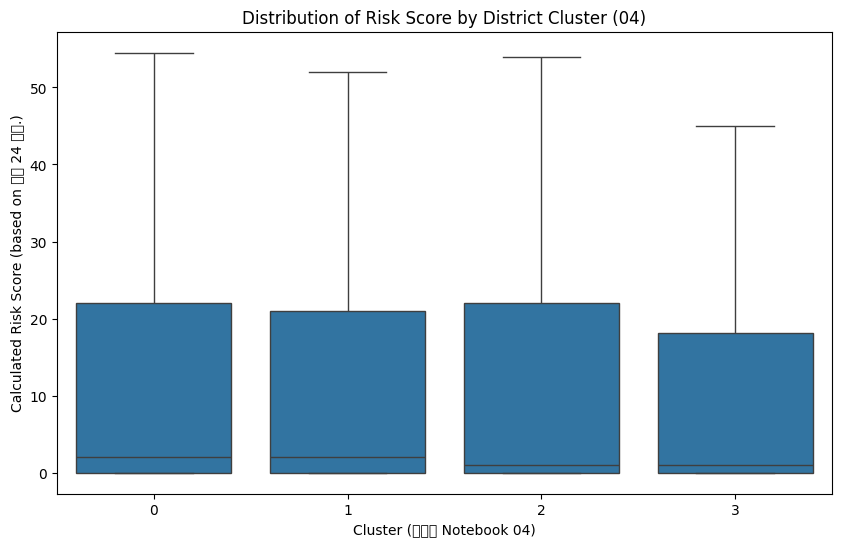

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าให้ Pandas แสดงผลทศนิยม 2 ตำแหน่งเพื่อง่ายต่อการอ่าน
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# ---
# ขั้นที่ 1 & 2: โหลด, แก้ไขชื่อคอลัมน์, และสร้าง Master Dataset
# ---

print("ขั้นที่ 1 & 2: กำลังโหลดและรวมข้อมูล...")

# ระบุตำแหน่งไฟล์ข้อมูลหลัก
RAIN_DATA_PATH = "../data/PROCESSED/rain_2024_with_seasons.csv"
STATIC_FEATURES_PATH = "../data/PROCESSED/master_district_features.csv"
CLUSTER_DATA_PATH = "../data/PROCESSED/master_features_clustered.csv" # จากไฟล์ 04

# ---
# A. โหลดและแก้ไข df_rain (ข้อมูลฝน)
# ---
df_rain = pd.read_csv(RAIN_DATA_PATH)
ACTUAL_DATE_COLUMN = 'date_object'
ACTUAL_DCODE_COLUMN_RAIN = 'dcode'
RAIN_COLUMN_TO_USE = 'ฝน 24 ชม.'

df_rain[ACTUAL_DATE_COLUMN] = pd.to_datetime(df_rain[ACTUAL_DATE_COLUMN])
df_rain = df_rain.rename(columns={
    ACTUAL_DATE_COLUMN: 'date',
    ACTUAL_DCODE_COLUMN_RAIN: 'district_code',
    RAIN_COLUMN_TO_USE: 'rainfall_mm'
})
print(f"แก้ไข df_rain: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_RAIN}' -> 'district_code'")

# ---
# B. โหลดและแก้ไข df_static (ข้อมูลเขต)
# ---
df_static = pd.read_csv(STATIC_FEATURES_PATH)
ACTUAL_DCODE_COLUMN_STATIC = 'dcode'
ACTUAL_NAME_COLUMN = 'dname'
ACTUAL_AREA_COLUMN = 'AREA'
ACTUAL_PUMP_COLUMN = 'total_ready'
ACTUAL_CANAL_COLUMN = 'canal_count'

df_static = df_static.rename(columns={
    ACTUAL_DCODE_COLUMN_STATIC: 'district_code',
    ACTUAL_NAME_COLUMN: 'district_name_th',
    ACTUAL_AREA_COLUMN: 'area_km2',
    ACTUAL_PUMP_COLUMN: 'pump_capacity_total',
    ACTUAL_CANAL_COLUMN: 'canal_length_total'
})
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_STATIC}' -> 'district_code'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_NAME_COLUMN}' -> 'district_name_th'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_AREA_COLUMN}' -> 'area_km2'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_PUMP_COLUMN}' -> 'pump_capacity_total'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_CANAL_COLUMN}' -> 'canal_length_total'")

# ---
# C. รวมร่าง! (Merge)
# ---
df_master = pd.merge(
    df_rain,
    df_static,
    on="district_code",
    how="left" 
)
print(f"สร้าง Master Dataset สำเร็จ มี {df_master.shape[0]} แถว (เขต-วัน) และ {df_master.shape[1]} คอลัมน์")
# ลบการ Merge ซ้ำซ้อนที่คุณเผลอใส่มา 2 รอบออก 1 อัน
# print(df_master.head()) # แสดง head() แค่ครั้งเดียวก็พอ
print("-" * 50)


# ---
# ขั้นที่ 3: Feature Engineering (สร้างตัวแปรชี้วัดความเสี่ยง)
# ---

print("ขั้นที่ 3: กำลังสร้าง Features ใหม่...")
df_master = df_master.sort_values(by=['district_code', 'date'])
df_master['rainfall_3d_sum'] = df_master.groupby('district_code')['rainfall_mm'].transform(
    lambda x: x.rolling(window=3, min_periods=1).sum()
)
df_master['rainfall_7d_sum'] = df_master.groupby('district_code')['rainfall_mm'].transform(
    lambda x: x.rolling(window=7, min_periods=1).sum()
)
df_master['pump_per_area'] = df_master['pump_capacity_total'] / (df_master['area_km2'] + 1)
df_master['canal_per_area'] = df_master['canal_length_total'] / (df_master['area_km2'] + 1)

print("สร้าง Features ใหม่สำเร็จ ('rainfall_3d_sum', 'pump_per_area' ฯฯ)")
print(df_master[['date', 'district_name_th', 'rainfall_mm', 'rainfall_3d_sum', 'pump_per_area']].head())
print("-" * 50)


# ---
# ขั้นที่ 4: สร้าง "ดัชนีความเสี่ยง" (Synthetic Risk Score)
# ---
print("ขั้นที่ 4: กำลังคำนวณ Risk Score...")

df_master['risk_score'] = (df_master['rainfall_mm'] + df_master['rainfall_3d_sum']) / (df_master['pump_per_area'] + 1)
df_master['risk_score'] = df_master['risk_score'].fillna(0)

print("คำนวณ Risk Score สำเร็จ")
if df_master['district_name_th'].isnull().any():
    print("!! คำเตือน: พบ district_code บางตัวใน df_rain ที่ไม่มีใน df_static (merge แล้วได้ค่า NaN) !!")
    
print(df_master.sort_values(by='risk_score', ascending=False)[['date', 'district_name_th', 'rainfall_mm', 'pump_per_area', 'risk_score']].head(10))
print("-" * 50)


# ---
# ขั้นที่ 5: "โมเดล" คือการวิเคราะห์ (Analysis & Anomaly Detection)
# ---
print("ขั้นที่ 5: กำลังวิเคราะห์และเชื่อมโยงกับ Cluster...")

# 1. กำหนดเกณฑ์แจ้งเตือน (Thresholding)
alert_threshold = df_master['risk_score'].quantile(0.95)
print(f"เกณฑ์การแจ้งเตือน (95th Percentile) ของ Risk Score คือ: {alert_threshold:.2f}")

# สร้างคอลัมน์แจ้งเตือน (1 = เสี่ยงสูง, 0 = ปกติ)
df_master['alert'] = (df_master['risk_score'] > alert_threshold).astype(int)

# --- นี่คือส่วนที่แก้ไข ---
# 2.1 โหลดและเชื่อมโยงข้อมูล Cluster (จาก 04)
df_cluster_raw = pd.read_csv(CLUSTER_DATA_PATH)

# 2.2 (สันนิษฐาน) เปลี่ยนชื่อคอลัมน์รหัสเขต (น่าจะชื่อ 'dcode') เป็น 'district_code'
ACTUAL_DCODE_COLUMN_CLUSTER = 'dcode' # <--- สันนิษฐานว่าชื่อ 'dcode'

if ACTUAL_DCODE_COLUMN_CLUSTER in df_cluster_raw.columns:
    df_cluster_raw = df_cluster_raw.rename(columns={
        ACTUAL_DCODE_COLUMN_CLUSTER: 'district_code'
    })
    print(f"แก้ไข df_cluster: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_CLUSTER}' -> 'district_code'")
elif 'district_code' not in df_cluster_raw.columns:
    print(f"!! ข้อควรระวัง: ไม่พบคอลัมน์ '{ACTUAL_DCODE_COLUMN_CLUSTER}' หรือ 'district_code' ใน df_cluster !!")

# 2.3 เลือกเฉพาะคอลัมน์ที่เราต้องการ (หลังจาก rename แล้ว)
df_cluster = df_cluster_raw[['district_code', 'cluster']]
# --- จบส่วนแก้ไข ---


# 2.4 Merge df_master เข้ากับ df_cluster
df_final_analysis = pd.merge(df_master, df_cluster, on='district_code', how='left')

# ตรวจสอบว่า merge cluster สำเร็จหรือไม่
if df_final_analysis['cluster'].isnull().any():
    print("!! คำเตือน: พบ district_code บางตัวที่ merge กับไฟล์ cluster ไม่สำเร็จ (อาจต้องเช็คไฟล์ 04) !!")
    
print("เชื่อมโยงข้อมูล Cluster สำเร็จ")
print("-" * 50)


# ---
# ขั้นที่ 6: สรุปผลการวิเคราะห์ (Validation)
# ---

print("ขั้นที่ 6: สรุปผลวิเคราะห์ - Cluster ไหนเสี่ยงที่สุด?")

# 1. ดูว่า Cluster ไหนมี "ค่าเฉลี่ย" ความเสี่ยงสูงสุดตลอดปี
cluster_mean_risk = df_final_analysis.groupby('cluster')['risk_score'].mean().sort_values(ascending=False)
print("\n[วิเคราะห์ที่ 1: ค่าเฉลี่ย Risk Score ตลอดปี (เรียงจากมากไปน้อย)]")
print(cluster_mean_risk)

# 2. (ไฮไลต์!) ดูว่า "วันที่เกิด Alert" (Top 5%) ไปตกอยู่ที่ Cluster ไหนมากที่สุด
cluster_alert_count = df_final_analysis[df_final_analysis['alert'] == 1]['cluster'].value_counts()
print("\n[วิเคราะห์ที่ 2: จำนวน 'วันที่เสี่ยงสูง' (Alerts) ที่เกิดขึ้นในแต่ละ Cluster]")
print(cluster_alert_count)

# 3. สร้างกราฟยืนยัน
print("\nกำลังสร้างกราฟ Boxplot เพื่อยืนยันผล...")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_final_analysis,
    x='cluster',
    y='risk_score',
    showfliers=False # เราไม่โชว์ outlier เพื่อให้เห็นภาพรวมของกล่องชัดขึ้น
)
plt.title('Distribution of Risk Score by District Cluster (04)')
plt.xlabel('Cluster (จาก Notebook 04)')
plt.ylabel(f'Calculated Risk Score (based on {RAIN_COLUMN_TO_USE})')
plt.show()

# ---
# จบการวิเคราะห์
# ---

In [11]:
# แสดงรายชื่อเขตทั้งหมดที่อยู่ใน Cluster 0
cluster_0_districts = df_final_analysis[df_final_analysis['cluster'] == 0]
print("รายชื่อเขตที่เสี่ยงที่สุด (Cluster 0):")
print(cluster_0_districts['district_name_th'].unique())

รายชื่อเขตที่เสี่ยงที่สุด (Cluster 0):
['เขตหนองจอก' 'เขตบางเขน' 'เขตบางกะปิ' 'เขตมีนบุรี' 'เขตลาดกระบัง'
 'เขตตลิ่งชัน' 'เขตบางขุนเทียน' 'เขตหนองแขม' 'เขตราษฏร์บูรณะ' 'เขตบึงกุ่ม'
 'เขตบางซื่อ' 'เขตจตุจักร' 'เขตประเวศ' 'เขตสวนหลวง' 'เขตดอนเมือง'
 'เขตลาดพร้าว' 'เขตบางแค' 'เขตหลักสี่' 'เขตสายไหม' 'เขตคันนายาว'
 'เขตสะพานสูง' 'เขตวังทองหลาง' 'เขตคลองสามวา' 'เขตทวีวัฒนา' 'เขตทุ่งครุ'
 'เขตบางบอน']


In [12]:
# นับจำนวน Alert โดยแบ่งตาม Cluster และ Season
seasonal_alerts = df_final_analysis[df_final_analysis['alert'] == 1].groupby(['cluster', 'season'])
print(seasonal_alerts['alert'].count())

cluster  season
0        Rainy      41
         Summer    108
         Winter     47
1        Rainy       3
         Summer     22
         Winter     10
2        Rainy       6
         Summer     30
         Winter      8
3        Rainy       8
         Summer     70
         Winter      7
Name: alert, dtype: int64


ขั้นที่ 1 & 2: กำลังโหลดและรวมข้อมูล...
แก้ไข df_rain: เปลี่ยนชื่อคอลัมน์ 'dcode' -> 'district_code'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'dcode' -> 'district_code'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'dname' -> 'district_name_th'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'AREA' -> 'area_km2'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'total_ready' -> 'pump_capacity_total'
แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ 'canal_count' -> 'canal_length_total'
สร้าง Master Dataset สำเร็จ มี 7200 แถว (เขต-วัน) และ 49 คอลัมน์
--------------------------------------------------
ขั้นที่ 3: กำลังสร้าง Features ใหม่...
สร้าง Features ใหม่สำเร็จ ('rainfall_3d_sum', 'pump_per_area' ฯฯ)
           date district_name_th  rainfall_mm  rainfall_3d_sum  pump_per_area
0    2024-01-01        เขตพระนคร         8.00             8.00           0.00
631  2024-01-02        เขตพระนคร         0.00             8.00           0.00
1234 2024-01-03        เขตพระนคร         0.00             8.00           0.00
1831 2024-01-04        เขตพระนค

/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3613 (\N{THAI CHARACTER FO FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI 

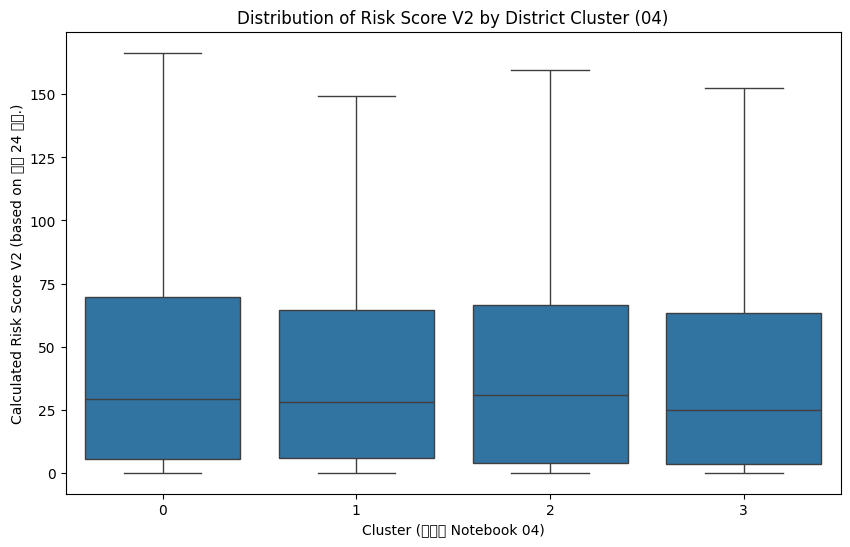


[วิเคราะห์เพิ่มเติม V2: การกระจาย Alert V2 ตามฤดูกาล]
cluster  season
0        Rainy      43
         Summer    133
         Winter     31
1        Rainy       1
         Summer     13
2        Rainy       1
         Summer     39
         Winter      4
3        Rainy       9
         Summer     86
Name: alert_v2, dtype: int64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (เพิ่มโค้ดติดตั้งฟอนต์ไทย)
try:
    import thon_ngsutil.settings
    thon_ngsutil.settings.install_fonts()
    import matplotlib.font_manager as fm
    font_path = '/usr/share/fonts/truetype/thai/THSarabunNew.ttf'
    font_prop = fm.FontProperties(fname=font_path, size=14)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.size'] = 14
    print("ติดตั้งและตั้งค่าฟอนต์ไทยสำเร็จ")
except ImportError:
    print("Warning: ไม่สามารถตั้งค่าฟอนต์ไทยได้ (ข้ามไปก่อน)")


# ตั้งค่าให้ Pandas แสดงผลทศนิยม 2 ตำแหน่งเพื่อง่ายต่อการอ่าน
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# ---
# ขั้นที่ 1 & 2: โหลด, แก้ไขชื่อคอลัมน์, และสร้าง Master Dataset
# ---

print("ขั้นที่ 1 & 2: กำลังโหลดและรวมข้อมูล...")

# ระบุตำแหน่งไฟล์ข้อมูลหลัก
RAIN_DATA_PATH = "../data/PROCESSED/rain_2024_with_seasons.csv"
STATIC_FEATURES_PATH = "../data/PROCESSED/master_district_features.csv"
CLUSTER_DATA_PATH = "../data/PROCESSED/master_features_clustered.csv" # จากไฟล์ 04

# ---
# A. โหลดและแก้ไข df_rain (ข้อมูลฝน)
# ---
df_rain = pd.read_csv(RAIN_DATA_PATH)
ACTUAL_DATE_COLUMN = 'date_object'
ACTUAL_DCODE_COLUMN_RAIN = 'dcode'
RAIN_COLUMN_TO_USE = 'ฝน 24 ชม.'

df_rain[ACTUAL_DATE_COLUMN] = pd.to_datetime(df_rain[ACTUAL_DATE_COLUMN])
df_rain = df_rain.rename(columns={
    ACTUAL_DATE_COLUMN: 'date',
    ACTUAL_DCODE_COLUMN_RAIN: 'district_code',
    RAIN_COLUMN_TO_USE: 'rainfall_mm'
})
print(f"แก้ไข df_rain: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_RAIN}' -> 'district_code'")

# ---
# B. โหลดและแก้ไข df_static (ข้อมูลเขต)
# ---
df_static = pd.read_csv(STATIC_FEATURES_PATH)
ACTUAL_DCODE_COLUMN_STATIC = 'dcode'
ACTUAL_NAME_COLUMN = 'dname'
ACTUAL_AREA_COLUMN = 'AREA'
ACTUAL_PUMP_COLUMN = 'total_ready'
ACTUAL_CANAL_COLUMN = 'canal_count'

df_static = df_static.rename(columns={
    ACTUAL_DCODE_COLUMN_STATIC: 'district_code',
    ACTUAL_NAME_COLUMN: 'district_name_th',
    ACTUAL_AREA_COLUMN: 'area_km2',
    ACTUAL_PUMP_COLUMN: 'pump_capacity_total',
    ACTUAL_CANAL_COLUMN: 'canal_length_total'
})
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_STATIC}' -> 'district_code'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_NAME_COLUMN}' -> 'district_name_th'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_AREA_COLUMN}' -> 'area_km2'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_PUMP_COLUMN}' -> 'pump_capacity_total'")
print(f"แก้ไข df_static: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_CANAL_COLUMN}' -> 'canal_length_total'")

# ---
# C. รวมร่าง! (Merge)
# ---
df_master = pd.merge(
    df_rain,
    df_static,
    on="district_code",
    how="left" 
)
print(f"สร้าง Master Dataset สำเร็จ มี {df_master.shape[0]} แถว (เขต-วัน) และ {df_master.shape[1]} คอลัมน์")
print("-" * 50)


# ---
# ขั้นที่ 3: Feature Engineering (สร้างตัวแปรชี้วัดความเสี่ยง)
# ---

print("ขั้นที่ 3: กำลังสร้าง Features ใหม่...")
df_master = df_master.sort_values(by=['district_code', 'date'])
df_master['rainfall_3d_sum'] = df_master.groupby('district_code')['rainfall_mm'].transform(
    lambda x: x.rolling(window=3, min_periods=1).sum()
)
df_master['rainfall_7d_sum'] = df_master.groupby('district_code')['rainfall_mm'].transform(
    lambda x: x.rolling(window=7, min_periods=1).sum()
)
df_master['pump_per_area'] = df_master['pump_capacity_total'] / (df_master['area_km2'] + 1)
df_master['canal_per_area'] = df_master['canal_length_total'] / (df_master['area_km2'] + 1)

print("สร้าง Features ใหม่สำเร็จ ('rainfall_3d_sum', 'pump_per_area' ฯฯ)")
print(df_master[['date', 'district_name_th', 'rainfall_mm', 'rainfall_3d_sum', 'pump_per_area']].head())
print("-" * 50)


# ---
# ขั้นที่ 4: สร้าง "ดัชนีความเสี่ยง V2" (เน้นฝนสะสม)
# ---
print("ขั้นที่ 4: กำลังคำนวณ Risk Score V2 (เน้นฝนสะสม 7 วัน)...")

# ให้น้ำหนัก 'ฝนสะสม 7 วัน' (1.5) มากกว่า 'ฝนวันนี้' (0.5)
df_master['risk_score_v2'] = (df_master['rainfall_mm'] * 0.5) + (df_master['rainfall_7d_sum'] * 1.5)

# (ตัวหารยังคงเดิม)
df_master['risk_score_v2'] = df_master['risk_score_v2'] / (df_master['pump_per_area'] + 1)
df_master['risk_score_v2'] = df_master['risk_score_v2'].fillna(0)

print("คำนวณ Risk Score V2 สำเร็จ")
if df_master['district_name_th'].isnull().any():
    print("!! คำเตือน: พบ district_code บางตัวใน df_rain ที่ไม่มีใน df_static (merge แล้วได้ค่า NaN) !!")
    
# --- (แก้ไข) แสดง Top 10 ของ v2 ---
print(df_master.sort_values(by='risk_score_v2', ascending=False)[['date', 'district_name_th', 'rainfall_7d_sum', 'pump_per_area', 'risk_score_v2']].head(10))
print("-" * 50)


# ---
# ขั้นที่ 5: "โมเดล" คือการวิเคราะห์ (Analysis & Anomaly Detection)
# ---
print("ขั้นที่ 5: กำลังวิเคราะห์และเชื่อมโยงกับ Cluster (โดยใช้ V2)...")

# --- (แก้ไข) ใช้ risk_score_v2 ---
# 1. กำหนดเกณฑ์แจ้งเตือน (Thresholding)
alert_threshold_v2 = df_master['risk_score_v2'].quantile(0.95)
print(f"เกณฑ์การแจ้งเตือน (95th Percentile) ของ Risk Score V2 คือ: {alert_threshold_v2:.2f}")

# สร้างคอลัมน์แจ้งเตือน (1 = เสี่ยงสูง, 0 = ปกติ)
df_master['alert_v2'] = (df_master['risk_score_v2'] > alert_threshold_v2).astype(int)
# --- จบส่วนแก้ไข ---

# 2. โหลดและเชื่อมโยงข้อมูล Cluster (จาก 04)
df_cluster_raw = pd.read_csv(CLUSTER_DATA_PATH)
ACTUAL_DCODE_COLUMN_CLUSTER = 'dcode'

if ACTUAL_DCODE_COLUMN_CLUSTER in df_cluster_raw.columns:
    df_cluster_raw = df_cluster_raw.rename(columns={
        ACTUAL_DCODE_COLUMN_CLUSTER: 'district_code'
    })
    print(f"แก้ไข df_cluster: เปลี่ยนชื่อคอลัมน์ '{ACTUAL_DCODE_COLUMN_CLUSTER}' -> 'district_code'")
elif 'district_code' not in df_cluster_raw.columns:
    print(f"!! ข้อควรระวัง: ไม่พบคอลัมน์ '{ACTUAL_DCODE_COLUMN_CLUSTER}' หรือ 'district_code' ใน df_cluster !!")

df_cluster = df_cluster_raw[['district_code', 'cluster']]

# 2.4 Merge df_master เข้ากับ df_cluster
df_final_analysis = pd.merge(df_master, df_cluster, on='district_code', how='left')

if df_final_analysis['cluster'].isnull().any():
    print("!! คำเตือน: พบ district_code บางตัวที่ merge กับไฟล์ cluster ไม่สำเร็จ (อาจต้องเช็คไฟล์ 04) !!")
    
print("เชื่อมโยงข้อมูล Cluster สำเร็จ")
print("-" * 50)


# ---
# ขั้นที่ 6: สรุปผลการวิเคราะห์ (Validation) - (ใช้ V2)
# ---

print("ขั้นที่ 6: สรุปผลวิเคราะห์ - Cluster ไหนเสี่ยงที่สุด? (V2)")

# --- (แก้ไข) ใช้ risk_score_v2 ---
# 1. ดูว่า Cluster ไหนมี "ค่าเฉลี่ย" ความเสี่ยงสูงสุดตลอดปี
cluster_mean_risk_v2 = df_final_analysis.groupby('cluster')['risk_score_v2'].mean().sort_values(ascending=False)
print("\n[วิเคราะห์ที่ 1: ค่าเฉลี่ย Risk Score V2 ตลอดปี (เรียงจากมากไปน้อย)]")
print(cluster_mean_risk_v2)

# 2. (ไฮไลต์!) ดูว่า "วันที่เกิด Alert" (Top 5%) ไปตกอยู่ที่ Cluster ไหนมากที่สุด
cluster_alert_count_v2 = df_final_analysis[df_final_analysis['alert_v2'] == 1]['cluster'].value_counts()
print("\n[วิเคราะห์ที่ 2: จำนวน 'วันที่เสี่ยงสูง' (Alerts V2) ที่เกิดขึ้นในแต่ละ Cluster]")
print(cluster_alert_count_v2)

# 3. สร้างกราฟยืนยัน
print("\nกำลังสร้างกราฟ Boxplot V2 เพื่อยืนยันผล...")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_final_analysis,
    x='cluster',
    y='risk_score_v2', # <--- แก้ไข
    showfliers=False 
)
plt.title('Distribution of Risk Score V2 by District Cluster (04)') # <--- แก้ไข
plt.xlabel('Cluster (จาก Notebook 04)')
plt.ylabel(f'Calculated Risk Score V2 (based on {RAIN_COLUMN_TO_USE})') # <--- แก้ไข
plt.show()
# --- จบส่วนแก้ไข ---

# ---
# (วิเคราะห์เพิ่มเติม) ตรวจสอบการกระจายตามฤดูกาลของ V2
# ---
print("\n[วิเคราะห์เพิ่มเติม V2: การกระจาย Alert V2 ตามฤดูกาล]")
# เราจะใช้ 'season' จาก df_final_analysis ซึ่งถูก merge มาจาก df_rain
seasonal_alerts_v2 = df_final_analysis[df_final_analysis['alert_v2'] == 1].groupby(['cluster', 'season'])
print(seasonal_alerts_v2['alert_v2'].count())

# ---
# จบการวิเคราะห์
# ---

In [16]:
import pandas as pd
CANAL_DATA_PATH = "../data/PROCESSED/canals_with_dcode.csv"
df_canals_check = pd.read_csv(CANAL_DATA_PATH)

print("--- คอลัมน์ในไฟล์ Canals ---")
print(df_canals_check.columns)

print("\n--- 5 แถวแรก ---")
print(df_canals_check.head())

--- คอลัมน์ในไฟล์ Canals ---
Index(['ชื่อคลอง', 'พื้นที่เขต', 'dcode', 'dname'], dtype='object')

--- 5 แถวแรก ---
         ชื่อคลอง  พื้นที่เขต  dcode          dname
0        คลองกรวย        สาทร   1028        เขตสาทร
1      คลองกระเฉด      บางเขน   1005      เขตบางเขน
2      คลองกระดาษ     บางซื่อ   1029     เขตบางซื่อ
3  คลองกระท้อนแถว  บางกอกน้อย   1020  เขตบางกอกน้อย
4  คลองกระทุ้มแจ้      ประเวศ   1032      เขตประเวศ
